[1. 1. 1. 1. 1.]


[Text(0.6111111111111112, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 8124\nvalue = [4208, 3916]'),
 Text(0.3888888888888889, 0.8125, 'x[53] <= 0.5\ngini = 0.288\nsamples = 4596\nvalue = [800, 3796]'),
 Text(0.5, 0.875, 'True  '),
 Text(0.2777777777777778, 0.6875, 'x[63] <= 0.5\ngini = 0.132\nsamples = 4048\nvalue = [288, 3760]'),
 Text(0.2222222222222222, 0.5625, 'x[101] <= 0.5\ngini = 0.049\nsamples = 3856\nvalue = [96, 3760]'),
 Text(0.16666666666666666, 0.4375, 'x[25] <= 0.5\ngini = 0.025\nsamples = 3808\nvalue = [48, 3760]'),
 Text(0.1111111111111111, 0.3125, 'x[22] <= 0.5\ngini = 0.013\nsamples = 3784\nvalue = [24, 3760]'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 3760\nvalue = [0, 3760]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.2222222222222222, 0.3125, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.2777777777777778, 0.4375, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.3333333333333333, 0.5625,

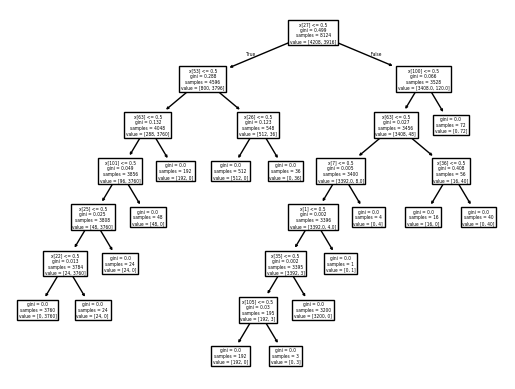

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

file_path = '../mushroom_dataset/agaricus-lepiota.data'
data = pd.read_csv(file_path, header=None)

def preprocess_data(data):
    # Map the first column ('e', 'p') to binary values
    data[0] = data[0].apply(lambda x: 1 if x == 'p' else 0)  # 1 for poisonous, 0 for edible
    X = pd.get_dummies(data.iloc[:, 1:])
    y = data[0]

    return X, y

x,y=preprocess_data(data)



kf = KFold(n_splits=5, shuffle=True, random_state=24)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)



from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(x,y)

scores = cross_val_score(tree_clf, x, y, cv=kf)


print(scores)

tree.plot_tree(tree_clf)



